In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display,clear_output
from PIL import Image as Im
import time

# Game of life - serial version

## bulk update


Here, certain initial conditions as well as update single process `life_step_2` procedure are defined.

Note, that update is periodic in both spatial directions

In [2]:
%%writefile game_of_life_utils.py

import numpy as np
from scipy.signal import convolve2d

def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_step_2(X):
    """Game of life step using scipy tools"""
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def set_ic(X,ic,offset=(0,0)):
    Ni,Nj = X.shape
    ni,nj = np.array(ic).shape
    assert(offset[0]+ni<Ni)
    assert(offset[1]+nj<Nj)
    X[offset[0]:offset[0]+ni, offset[1]:offset[1]+nj] = ic     
    

unbounded = [[1, 1, 1, 0, 1],
             [1, 0, 0, 0, 0],
             [0, 0, 0, 1, 1],
             [0, 1, 1, 0, 1],
             [1, 0, 1, 0, 1]]

diehard = [[0, 0, 0, 0, 0, 0, 1, 0],
           [1, 1, 0, 0, 0, 0, 0, 0],
           [0, 1, 0, 0, 0, 1, 1, 1]]

boat = [[1, 1, 0],
        [1, 0, 1],
        [0, 1, 0]]

r_pentomino = [[0, 1, 1],
               [1, 1, 0],
               [0, 1, 0]]

beacon = [[0, 0, 1, 1],
          [0, 0, 1, 1],
          [1, 1, 0, 0],
          [1, 1, 0, 0]]

acorn = [[0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [1, 1, 0, 0, 1, 1, 1]]

spaceship = [[0, 0, 1, 1, 0],
             [1, 1, 0, 1, 1],
             [1, 1, 1, 1, 0],
             [0, 1, 1, 0, 0]]

block_switch_engine = [[0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 1, 1],
                       [0, 0, 0, 0, 1, 0, 1, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [1, 0, 1, 0, 0, 0, 0, 0]]
glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

all_ics = [diehard,boat,r_pentomino,beacon,acorn,spaceship,block_switch_engine,glider_gun,unbounded]


Overwriting game_of_life_utils.py


## Initial conditions

`set_ic` - makes a stamp of initial condition on the domain `X`

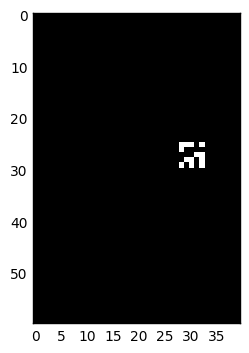

In [47]:
from game_of_life_utils import *

Ni,Nj = 60,40
X = np.zeros((Ni,Nj),dtype=np.bool)
set_ic(X,unbounded,offset = (25,28))
plt.imshow(X,interpolation='nearest',cmap='gray')

Different example:

```python
Ni,Nj = 299,299
X = np.zeros((Ni,Nj),dtype=np.bool)
r = np.random.random((Ni,Nj))
X[:,:] = (r > 0.625)
```

## Running a simulation - single process

In [48]:
%%time 
Xtime=[]
for s in range(225):
    X = life_step_2(X)
    Xtime.append(X.copy())
   

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 30.1 ms


## Visualization

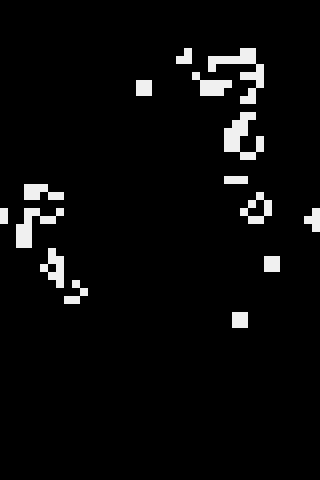

224


In [30]:
n = max(Ni,Nj)
if n<100:
    scale = 500//n
else:
    scale = 1
    
for i,X_ in enumerate(Xtime[::]):
    clear_output(wait=True)
    time.sleep(0.05)
    display(Im.fromarray(240*X_.astype(np.uint8)).resize((scale*Nj,scale*Ni)))
    print(s)
   

# Parallel game of life

We use 1d partitioning in first index, this will ensure that buffers are contigous in memory (if domain i row major array).

In [49]:
import ipyparallel as ipp
c = ipp.Client(profile='mpi')
print(c.ids)
view = c[:]
view.activate()


[0, 1, 2, 3, 4, 5]


### setting proper working directory

Engines started by ipyparallel have by default $HOME as working directory, since we import a file we might change it to current working directory of the project.

In [52]:
import os
notebook_wd = os.getcwd()

In [53]:
import os
print(view.apply_sync(os.getcwd))

['/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI']


In [55]:
view.map(os.chdir, [notebook_wd]*len(c.ids))
print(view.apply_sync(os.getcwd))

['/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI', '/home/users/marcin.kostur/ProgramowanieRownolegle/MPI']


### first version 

subdomains on the left write to those on the right
note that periodic boundary condision is not globally set.

In [61]:
%%px --block


from mpi4py import MPI 
import numpy as np


from game_of_life_utils import *

#number of procesess:

comm = MPI.COMM_WORLD
No_processes = comm.Get_size()
rank = comm.Get_rank()

#constants

Ni,Nj = No_processes*10,40
Niter = 225

#area:

if rank==0:    
   
    X = np.zeros((Ni,Nj),dtype=np.bool)
    set_ic(X,unbounded,offset = (25,28))
    
else: 
    X = None

# subdomains:
buf = np.empty((Ni//No_processes,Nj),dtype=np.bool)
X_local = np.empty((Ni//No_processes+2,Nj),dtype=np.bool)

comm.Scatter(X, buf )
X_local[1:-1,:] = buf

U_local_time = []
Xtime = []
   
L_bulk  = (1,slice(None))
L_ghost = (0,slice(None))
R_bulk  = (-2, slice(None))
R_ghost = (-1, slice(None))

for i in range(Niter):
    
    if rank<(No_processes-1):
        comm.Send(X_local[R_bulk], dest=rank+1)
        comm.Recv(X_local[R_ghost],source=rank+1)
        
    if rank>0:
        comm.Recv(X_local[L_ghost],source=rank-1)
        comm.Send(X_local[L_bulk], dest=rank-1)
    
    X_local = life_step_2(X_local)

    comm.Gather(X_local[1:-1],X )
    if rank==0:
        Xtime.append( X.copy() )

    U_local_time.append( X_local[1:-1].copy() )


### version with glocal periodic boundaries

one can split the communication into even and odd nodes:

```python

if rank%2 == 0:
    comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
    comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)

if rank%2 == 1:
    comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
    comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)

if rank%2 == 1:
    comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
    comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)

if rank%2 == 0:
    comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
    comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)
```

In [24]:
%%px --block


from mpi4py import MPI 
import numpy as np


from game_of_life_utils import *

#number of procesess:

comm = MPI.COMM_WORLD
No_processes = comm.Get_size()
rank = comm.Get_rank()

#constants

Ni,Nj = No_processes*10,40
Niter = 225

#area:

if rank==0:    
   
    X = np.zeros((Ni,Nj),dtype=np.bool)
    set_ic(X,unbounded,offset = (25,28))
    
else: 
    X = None

# subdomains:
buf = np.empty((Ni//No_processes,Nj),dtype=np.bool)
X_local = np.empty((Ni//No_processes+2,Nj),dtype=np.bool)

comm.Scatter(X, buf )
X_local[1:-1,:] = buf

U_local_time = []
Xtime = []
   
L_bulk  = (1,slice(None))
L_ghost = (0,slice(None))
R_bulk  = (-2, slice(None))
R_ghost = (-1, slice(None))

for i in range(Niter):
    
    if rank%2 == 0:
        comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
        comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)
        comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
        comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)
        
    if rank%2 == 1:
        comm.Recv(X_local[L_ghost],source=(rank-1)%No_processes)
        comm.Send(X_local[L_bulk], dest=(rank-1)%No_processes)
        comm.Send(X_local[R_bulk], dest=(rank+1)%No_processes)
        comm.Recv(X_local[R_ghost],source=(rank+1)%No_processes)

   
    X_local = life_step_2(X_local)

    comm.Gather(X_local[1:-1],X )
    if rank==0:
        Xtime.append( X.copy() )

    U_local_time.append( X_local[1:-1].copy() )


### 3rd version  - using `Sendrecv`

Using `Sendrecv` one can avoid potential lock-outs.

In [41]:
%%px --block


from mpi4py import MPI 
import numpy as np


from game_of_life_utils import *

#number of procesess:

comm = MPI.COMM_WORLD
No_processes = comm.Get_size()
rank = comm.Get_rank()

#constants

Ni,Nj = No_processes*10,40
Niter = 225

#area:

if rank==0:    
   
    X = np.zeros((Ni,Nj),dtype=np.bool)
    set_ic(X,unbounded,offset = (25,28))
    
else: 
    X = None

# subdomains:
buf = np.empty((Ni//No_processes,Nj),dtype=np.bool)
X_local = np.empty((Ni//No_processes+2,Nj),dtype=np.bool)

comm.Scatter(X, buf )
X_local[1:-1,:] = buf

U_local_time = []
Xtime = []
   
L_bulk  = (1,slice(None))
L_ghost = (0,slice(None))
R_bulk  = (-2, slice(None))
R_ghost = (-1, slice(None))

for i in range(Niter):
    
    if rank%2 == 0:
        comm.Sendrecv(X_local[R_bulk], dest=(rank+1)%No_processes,sendtag=0,\
                      recvbuf=X_local[R_ghost],source=(rank+1)%No_processes)
        comm.Sendrecv(X_local[L_bulk], dest=(rank-1)%No_processes,sendtag=0, \
                      recvbuf=X_local[L_ghost],source=(rank-1)%No_processes)
       
        
    if rank%2 == 1:
        comm.Sendrecv(X_local[L_bulk], dest=(rank-1)%No_processes,sendtag=0,\
                      recvbuf=X_local[L_ghost],source=(rank-1)%No_processes)
        comm.Sendrecv(X_local[R_bulk], dest=(rank+1)%No_processes,sendtag=0,\
                      recvbuf=X_local[R_ghost],source=(rank+1)%No_processes)
      

   
    X_local = life_step_2(X_local)

    comm.Gather(X_local[1:-1],X )
    if rank==0:
        Xtime.append( X.copy() )

    U_local_time.append( X_local[1:-1].copy() )


# Comparison of parallel and single process versions

Above parallel examples are set to use the same IC and glocal  board size as the single process one.
On `rank=0` we gather the time evolution of global domain, therefore one can easily validate the parallel version. 

In [56]:
np.argsort(view['rank'])[0]

4

In [57]:
len( view['Xtime'][ np.argsort(view['rank'])[0] ] ) 

225

- `Xtime_parallel`  will be a copy (in this notebook) of table of time snashots of global domain .
- `Xtime` - keeps the results of a serial simulation

In [62]:
Xtime_parallel =  view['Xtime'][ np.argsort(view['rank'])[0] ] 


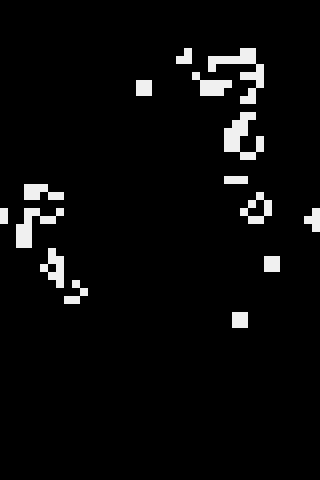

224


In [44]:
Ni, Nj = Xtime_parallel[0].shape
n = max(Ni,Nj)
if n<100:
    scale = 500//n
else:
    scale = 1
    
for i,X_ in enumerate(Xtime_parallel[::]):
    clear_output(wait=True)
    time.sleep(0.02)
    display(Im.fromarray(240*X_.astype(np.uint8)).resize((scale*Nj,scale*Ni)))
    print(i)
   

### validation

- for each timestep we want identical results
- below, the first number should be equal to number of timesteps



In [65]:
sum([np.all(X_ == Xp_) for X_,Xp_ in zip(Xtime,Xtime_parallel)]), len(Xtime)

(167, 225)

In [64]:
for X_,Xp_ in zip(Xtime,Xtime_parallel):
    print (np.all(X_ == Xp_))